In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('./rawdata.xlsx')
data

,date,time,sensor,location,number,activity,position,location.1
0,2024-01-16,10:10:30,0.0,A1,1,placed,inside,A1
1,2024-01-16,10:12:30,1.0,A2,1,picked,inside,A2
2,2024-01-16,10:28:30,1.0,A3,1,picked,Inside,A3
3,2024-01-16,10:38:20,0.0,A4,1,placed,Inside,A4
4,2024-01-16,10:45:20,1.0,A5,1,placed,inside,A5
...,...,...,...,...,...,...,...,...
170,2024-01-18,12:45:05,0.0,A8,2,placed,inside,A8
171,2024-01-18,12:53:10,1.0,A9,2,picked,inside,A9
172,2024-01-18,12:59:10,1.0,A10,2,placed,outside,A10
173,2024-01-18,13:10:20,1.0,A11,2,picked,Inside,A11


In [ ]:
data.shape

(175, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        175 non-null    datetime64[ns]
 1   time        175 non-null    object        
 2   sensor      174 non-null    float64       
 3   location    175 non-null    object        
 4   number      175 non-null    int64         
 5   activity    175 non-null    object        
 6   position    175 non-null    object        
 7   location.1  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 11.1+ KB


In [ ]:
data.isnull().sum()

date          0
time          0
sensor        1
location      0
number        0
activity      0
position      0
location.1    0
dtype: int64

In [ ]:
data['sensor'].fillna(data['sensor'].mean(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        175 non-null    datetime64[ns]
 1   time        175 non-null    object        
 2   sensor      175 non-null    float64       
 3   location    175 non-null    object        
 4   number      175 non-null    int64         
 5   activity    175 non-null    object        
 6   position    175 non-null    object        
 7   location.1  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 11.1+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
for col in data.columns:
  if data[col].dtype==object:
    print(f'For {col} numver of unique values is {data[col].nunique()}')

For time numver of unique values is 140
For location numver of unique values is 34
For activity numver of unique values is 2
For position numver of unique values is 3
For location.1 numver of unique values is 34


In [ ]:
data.describe()

,date,sensor,number
count,175,175.000000,175.000000
mean,2024-01-16 23:27:05.142857216,0.511494,1.165714
min,2024-01-16 00:00:00,0.000000,1.000000
25%,2024-01-16 00:00:00,0.000000,1.000000
50%,2024-01-17 00:00:00,1.000000,1.000000
75%,2024-01-18 00:00:00,1.000000,1.000000
max,2024-01-18 00:00:00,1.000000,2.000000
std,NaN,0.499868,0.372891


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['time'] = data['time'].astype(str)
data['time'] = pd.to_timedelta(data['time'])

duration_df = data.groupby(['date', 'position'])['time'].sum().reset_index()
duration_df['time'] = duration_df['time'].astype(str)
duration_df

,date,position,time
0,2024-01-16,Inside,0 days 21:06:50
1,2024-01-16,inside,9 days 06:02:20
2,2024-01-17,inside,9 days 00:47:50
3,2024-01-18,Inside,6 days 22:22:13
4,2024-01-18,inside,35 days 06:57:29
5,2024-01-18,outside,2 days 15:31:30


from matplotlib import pyplot as plt
import seaborn as sns
duration_df.groupby('position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
duration_df.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = duration_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('position')):
  _plot_series(series, series_name, i)
  fig.legend(title='position', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = duration_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = duration_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('position')):
  _plot_series(series, series_name, i)
  fig.legend(title='position', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = duration_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time'].value_counts()
    for x_label, grp in duration_df.groupby('position')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('position')
_ = plt.ylabel('time')

<Axes: ylabel='position'>

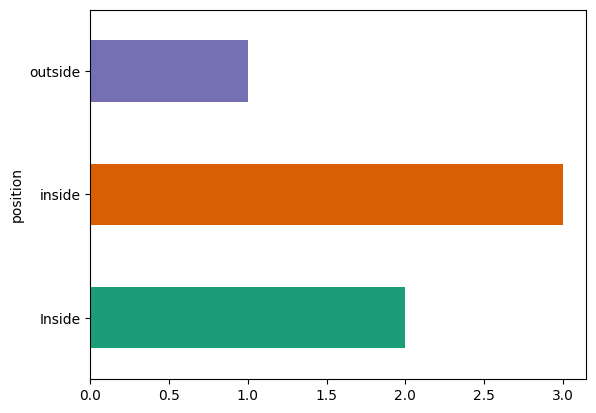

In [ ]:
duration_df.groupby('position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
data['date'] = pd.to_datetime(data['date'])
activity_df = data.groupby(['date', 'activity']).size().reset_index(name='count')
activity_df

,date,activity,count
0,2024-01-16,picked,40
1,2024-01-16,placed,40
2,2024-01-17,picked,10
3,2024-01-17,placed,9
4,2024-01-18,picked,37
5,2024-01-18,placed,39


from matplotlib import pyplot as plt
activity_df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
activity_df.groupby('activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = activity_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('activity')):
  _plot_series(series, series_name, i)
  fig.legend(title='activity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = activity_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('activity')):
  _plot_series(series, series_name, i)
  fig.legend(title='activity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = activity_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('activity')):
  _plot_series(series, series_name, i)
  fig.legend(title='activity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = activity_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('activity')):
  _plot_series(series, series_name, i)
  fig.legend(title='activity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
activity_df['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(activity_df['activity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(activity_df, x='count', y='activity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: ylabel='activity'>

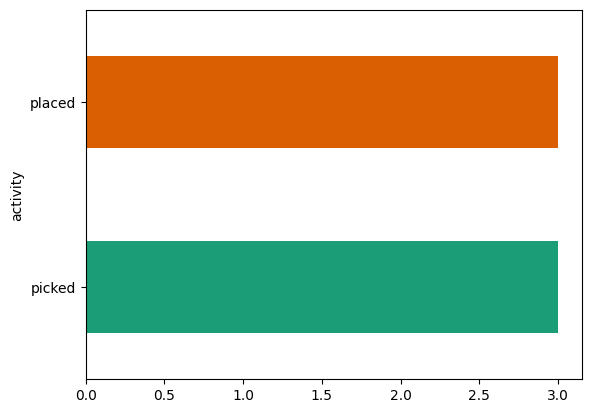

In [ ]:
activity_df.groupby('activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [ ]:
duration_df.to_csv('duration.csv', index=False)

In [ ]:
activity_df.to_csv('activity.csv', index=False)